### Linear Regression -- Single Variable

In [21]:
import os
import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [22]:
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/homeprices.csv'
filename = 'homeprices.csv'
if os.path.isfile(filename):
    print('file exists')
else:
    wget.download(url,filename)

file exists


In [23]:
df = pd.read_csv(filename)
df

area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

<IPython.core.display.Javascript object>


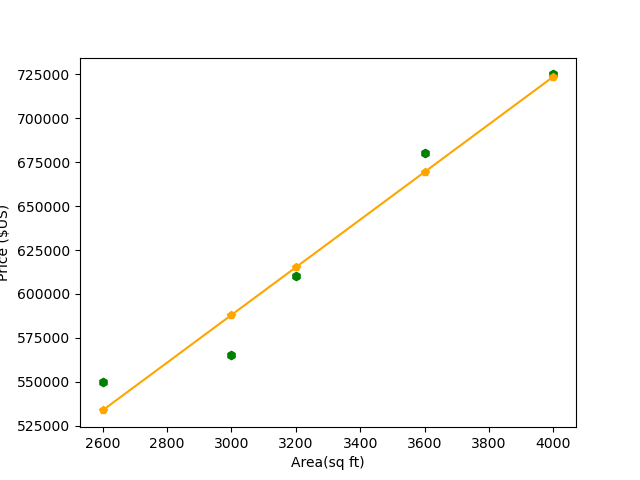

In [24]:
%matplotlib notebook
plt.xlabel('Area(sq ft)')
plt.ylabel('Price ($US)')
plt.scatter(df['area'], df['price'], color= 'green', marker='h')
plt.show()

In [25]:
lreg = linear_model.LinearRegression()

In [26]:
lreg.fit(df[['area']], df.price)

LinearRegression()

In [27]:
print(lreg.predict([[3300]]))
print(lreg.coef_)
print(lreg.intercept_)

[628715.75342466]
[135.78767123]
180616.43835616432


In [28]:
plt.plot(df['area'], lreg.predict(df[['area']]), color='orange', marker='p')

In [29]:
if os.path.isfile('areas.csv'):
    print('file exists')
else:
    wget.download('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/areas.csv')

file exists


In [30]:
df_predict = pd.read_csv('areas.csv')
df_predict

area
0   1000
1   1500
2   2300
3   3540
4   4120
5   4560
6   5490
7   3460
8   4750
9   2300
10  9000
11  8600
12  7100

In [31]:
predicted_prices = lreg.predict(df_predict[['area']])

In [32]:
df_predict['prices'] = predicted_prices

In [33]:
df_predict.to_csv('predictions.csv', index=False)

### Exercise: Predict Canada's income per capita 

In [34]:
ex_file = 'canada_per_capita_income.csv'
if os.path.isfile(ex_file):
    print('file exists')
else:
    wget.download('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv')

file exists


In [35]:
df = pd.read_csv(ex_file)
df.head()

year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583

In [36]:
df.rename(columns={'per capita income (US$)':'income'}, inplace=True)
df.head()

year       income
0  1970  3399.299037
1  1971  3768.297935
2  1972  4251.175484
3  1973  4804.463248
4  1974  5576.514583

In [37]:
lreg = linear_model.LinearRegression()
lreg.fit(df[['year']], df['income'])

LinearRegression()

In [38]:
lreg.predict([[2020]])

array([41288.69409442])

<IPython.core.display.Javascript object>


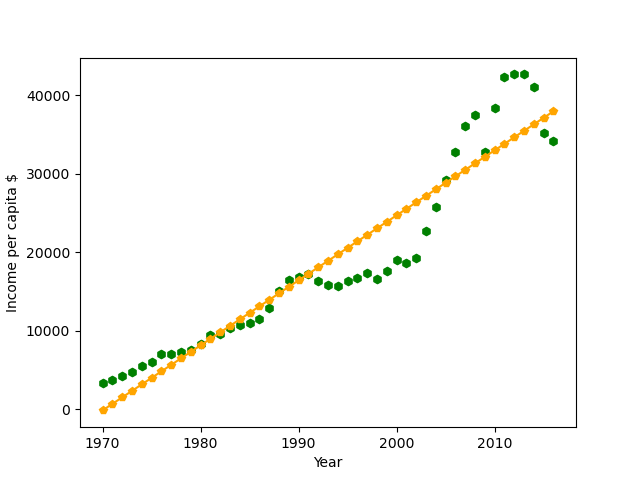

In [41]:
%matplotlib notebook
plt.xlabel('Year')
plt.ylabel('Income per capita $')
plt.scatter(df['year'], df['income'], color='green', marker = 'h')
plt.plot(df['year'], lreg.predict(df[['year']]), color ='orange', marker='p')